In [1]:
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [6]:
xtest = pd.read_csv('../data/processed/X_test_norm.csv')
x_train = pd.read_csv('../data/processed/X_train_norm.csv')
y_train = pd.read_csv('../data/processed/y_train_norm.csv')

x_test = xtest.drop(columns = 'Id')

# Ridge Feature Selection


In [7]:
ridge_coefs = []
ridge_alphas = np.logspace(-1, 7, 1000)
ridge_mdl = Ridge(max_iter = 1e7)

In [8]:
for alpha in ridge_alphas:
    ridge_lm.set_params(alpha = alpha).fit(x_train, y_train)
    ridge_coefs.extend(ridge_lm.coef_)

In [9]:
ridge_coefs

[array([ 7.34514400e-02,  1.81904315e-01, -4.86817844e-04,  6.55138847e-07,
        -2.31094656e-02,  1.91153849e-03,  2.27305301e-01,  1.71267662e-01,
         1.47992815e-01,  2.89559897e-01,  2.28537695e-01, -2.00832673e-01,
         1.22593230e-02, -2.15661563e-01, -1.26500980e-02,  2.88490985e-03,
        -1.09583234e-04,  2.43441777e-03,  1.48830646e-01,  2.63203347e-01,
         1.38037050e-01, -8.97804200e-02,  6.61520979e-02, -1.25347316e-05,
        -4.44105419e-05,  2.21455781e-03,  7.03336539e-02,  1.86157533e-02,
        -2.95117731e-02,  5.58511594e-03, -1.16190689e-02,  3.46465251e-03,
         7.73606166e-05,  1.24784875e-01, -1.70391982e-02,  1.55999521e-01,
        -1.78661213e-02,  7.08135162e-05,  6.35678995e-05,  6.55503431e-05,
         1.99930999e-04, -5.20378568e-03, -4.91536926e-02,  2.05761589e-02,
         5.13331532e-01,  2.97346871e-02,  8.56197702e-03, -3.54789040e-03,
        -1.14434455e-03,  3.80049908e-02,  5.63357279e-02,  8.57272015e-05,
         1.3

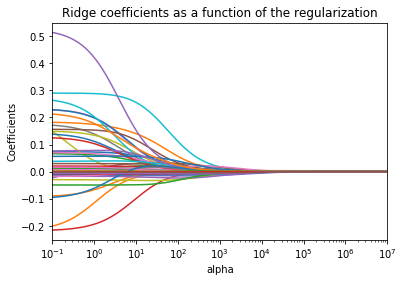

In [10]:
ridge_df_coef = pd.DataFrame(ridge_coefs, index = ridge_alphas, columns = x_train.columns)
title = 'Ridge coefficients as a function of the regularization'
ridge_df_coef.plot(logx = True, title = title, legend = False)
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.show()

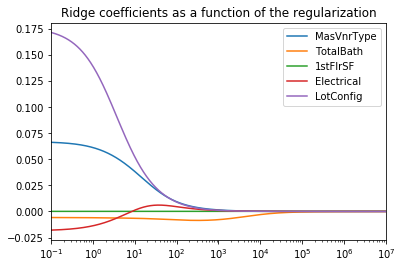

In [11]:
ridge_df_coef.iloc[:, np.random.choice(range(ridge_df_coef.shape[1]), size = 5, replace = False)].plot(logx=True, title=title)

In [12]:
ridge_df_coef

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remodeled,TotalPorchAreasSF,TotalBath,OtherRoomsAbvGrd
1.000000e-01,0.073451,0.181904,-0.000487,6.551388e-07,-2.310947e-02,1.911538e-03,2.273053e-01,1.712677e-01,1.479928e-01,0.289560,...,1.635662e-02,0.000003,0.000519,-3.946001e-03,-9.479014e-02,0.212344,-0.001167,0.000150,-0.005820,-0.001048
1.018610e-01,0.073449,0.181883,-0.000487,6.558011e-07,-2.275181e-02,1.946889e-03,2.272556e-01,1.711807e-01,1.471783e-01,0.289560,...,1.635909e-02,0.000003,0.000519,-3.945741e-03,-9.469727e-02,0.212248,-0.001167,0.000150,-0.005821,-0.001048
1.037567e-01,0.073447,0.181862,-0.000487,6.564700e-07,-2.239806e-02,1.982782e-03,2.272048e-01,1.710923e-01,1.463577e-01,0.289559,...,1.636155e-02,0.000003,0.000519,-3.945476e-03,-9.460285e-02,0.212151,-0.001167,0.000150,-0.005821,-0.001048
1.056876e-01,0.073444,0.181841,-0.000487,6.571458e-07,-2.204820e-02,2.019226e-03,2.271528e-01,1.710023e-01,1.455311e-01,0.289559,...,1.636399e-02,0.000003,0.000519,-3.945207e-03,-9.450685e-02,0.212052,-0.001167,0.000150,-0.005822,-0.001048
1.076545e-01,0.073442,0.181819,-0.000487,6.578284e-07,-2.170224e-02,2.056228e-03,2.270995e-01,1.709109e-01,1.446986e-01,0.289558,...,1.636640e-02,0.000003,0.000519,-3.944933e-03,-9.440924e-02,0.211951,-0.001167,0.000150,-0.005822,-0.001048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.288979e+06,0.000003,0.000002,-0.000011,1.155187e-06,-9.075285e-10,6.767577e-07,3.614936e-07,2.288461e-07,4.720737e-10,0.000005,...,2.182525e-07,-0.000005,0.000004,-1.027477e-06,9.248249e-07,0.000001,-0.000001,0.000185,-0.000016,-0.000004
9.461848e+06,0.000003,0.000002,-0.000010,1.154073e-06,-8.942799e-10,6.658535e-07,3.556070e-07,2.250278e-07,4.202887e-10,0.000005,...,2.151390e-07,-0.000005,0.000004,-1.007559e-06,9.105798e-07,0.000001,-0.000001,0.000185,-0.000016,-0.000004
9.637935e+06,0.000002,0.000002,-0.000010,1.153044e-06,-8.812046e-10,6.551187e-07,3.498146e-07,2.212716e-07,3.699814e-10,0.000005,...,2.120637e-07,-0.000005,0.000004,-9.880580e-07,8.965475e-07,0.000001,-0.000001,0.000184,-0.000016,-0.000004
9.817298e+06,0.000002,0.000002,-0.000010,1.152101e-06,-8.683020e-10,6.445510e-07,3.441149e-07,2.175767e-07,3.211114e-10,0.000005,...,2.090263e-07,-0.000005,0.000004,-9.689658e-07,8.827253e-07,0.000001,-0.000001,0.000183,-0.000016,-0.000003


## Hyperparameter tuning

In [13]:
ridge_alphas = np.logspace(-1, 7, 100)

ridge_cv=RidgeCV(alphas=ridge_alphas, cv=5)
ridge_mdl = ridge_cv.fit(x_train, y_train)
print(ridge_mdl.alpha_)
print(ridge_mdl.intercept_)

y_pred = ridge_mdl.predict(x_test)



1.1233240329780276
[-9.87092143]


In [14]:
ridge_cv.score(x_train,y_train)

0.8770645675385282

## Refined search

In [15]:
ridge_alphas2 = np.logspace(0, 2, 200)


In [16]:
ridge_cv2=RidgeCV(alphas=ridge_alphas2, cv=5)
ridge_mdl2 = ridge_cv2.fit(x_train, y_train)
print(ridge_mdl2.alpha_)
print(ridge_mdl2.intercept_)

y_pred = ridge_mdl2.predict(x_test)

1.1489510001873091
[-9.81007287]


In [17]:
ridge_cv2.score(x_train,y_train)

0.8770437296585365

## Model Submission

In [19]:
y_predict = np.expm1(ridge_cv2.predict(xtest.loc[:,xtest.columns != 'Id']))

submission = pd.DataFrame({'Id': xtest['Id'], 'SalePrice': pd.Series(y_predict.reshape(-1,))})

submission.to_csv('submission_ridge.csv',index=False)

submission

,Id,SalePrice
0,1461,107102.883217
1,1462,148971.050785
2,1463,191358.466635
3,1464,207793.545992
4,1465,200525.921685
...,...,...
1454,2915,86908.859110
1455,2916,86824.311055
1456,2917,168994.635462
1457,2918,126070.574053
